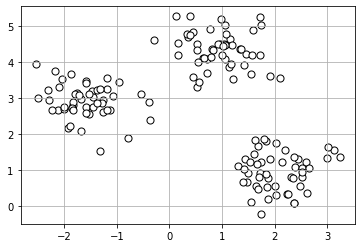

In [6]:
#以下用sklearn內建的資料及示範基本的KMeans和畫出散佈圖
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150,
                 n_features = 2,
                 centers = 3,
                 cluster_std = 0.5,
                 random_state = 0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1],
           c = 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol =1e-04,
           random_state = 0)
y_km = km.fit_predict(X)

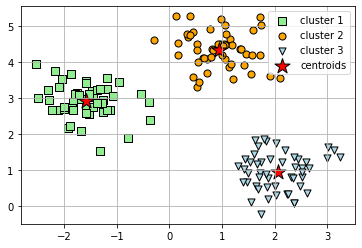

In [5]:
plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1],
           s = 50, c = 'lightgreen',
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1],
           s = 50, c = 'orange',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1],
           s = 50, c = 'lightblue',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s = 250, marker = '*',
           c = 'red', edgecolor = 'black',
           label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()


In [11]:
import pandas as pd
df = pd.read_csv(r'C:\Users\micky\Desktop\碩士\109-2\MahcineLearning\Grains\Grains\seeds.csv')
df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


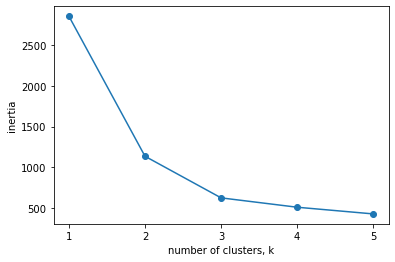

In [13]:
ks = range(1, 6)
inertias = []

#此迴圈透過嘗試分群數加上折線圖來找到底該分幾群好
for k in ks:
    
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
#利用crosstable來看分類的狀況是否良好
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df)

# Create a DataFrame with labels and varieties as columns: df
evu = pd.DataFrame({'labels': labels, 'varieties': df.loc[:,'1']})

# Create crosstab: ct
ct = pd.crosstab(evu['labels'], evu['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0           5   0  70
1           1  60   0
2          63  10   0


In [32]:
#接下來要嘗試優化分群
fish = pd.read_csv(r'C:\Users\micky\Desktop\碩士\109-2\MahcineLearning\Course 2- Unsupervised Learning\fish.csv', 
                   names = ['type','f1','f2','f3','f4','f5','f6'])
fish.head()

,type,f1,f2,f3,f4,f5,f6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
#這裡先把資料標準化後再透入模型
scaler = StandardScaler()

kmeans = KMeans(n_clusters = 4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(fish.loc[:,'f1':'f6'],fish.loc[:,'type'])

#一樣用crosstab來看好壞
labels = pipeline.predict(fish.loc[:,'f1':'f6'])

# Create a DataFrame with labels and species as columns: df
fish_c = pd.DataFrame({'labels':labels, 'species':fish.loc[:,'type']})

# Create crosstab: ct
ct = pd.crosstab(fish_c['labels'], fish_c['species'])

# Display ct
print(ct)

#由table可以看到其實標準化吼滿準確的，其他的標準化的工具還有像是normalizer
#from sklearn.preprocessing import Normalizer
#normalizer = Normalizer()

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13
